In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [67]:
df1 = pd.read_csv('Life Expectancy Data.csv')
df2 = pd.read_csv('Life_Expectancy_00_15.csv')

In [68]:
df1.sample(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1075,Guinea,2014,Developing,58.1,299.0,27,0.01,50.579765,51.0,175,...,42.0,5.64,51.0,0.5,561.997387,118559.0,7.5,7.4,0.412,8.6
1655,Mauritania,2011,Developing,62.2,212.0,8,0.01,79.276585,75.0,234,...,73.0,2.87,75.0,1.2,1393.261593,3717672.0,8.5,8.3,0.487,7.7
1341,Jordan,2004,Developing,72.5,125.0,4,0.54,32.525236,95.0,21,...,95.0,9.50,95.0,0.1,261.456882,5535595.0,3.9,3.8,0.723,13.5


In [69]:
df2.sample(3)

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
480,Denmark,2000,Europe,False,76.592683,5339616,9.850896,8.104383,6508.513381,14.290000,28658.124960,39.172431,1.457444,0.000000,100.000002,15.1,5.74827
1846,Uruguay,2006,South America,False,76.046000,3325403,1.903529,7.742874,2001.927269,9.063993,12419.555800,29.400000,2.006178,1.320928,97.660396,23.9,1.44410
277,Cambodia,2005,Asia,True,63.088000,13273355,0.200401,6.854018,55.715103,60.532036,1724.152771,0.317322,1.127579,69.874824,60.294322,1.7,0.77292


In [70]:
df_vis = pd.merge(df1, df2, how='outer', on=['Country','Year'])
df_vis.to_csv('merged_life_expectancy.csv')

In [71]:
df1_2013_only_countries = [
    'Dominica',
    'Cook Islands',
    'Marshall Islands',
    'Monaco',
    'Nauru',
    'Niue',
    'Palau',
    'Saint Kitts and Nevis',
    'San Marino',
    'Tuvalu'
]

In [72]:
df1_only_countries_list = [  # Not including 2013 only countries which are not in df2 either
    'Afghanistan',
    'Antigua and Barbuda',
    'Azerbaijan',
    'Bahamas',
    'Barbados',
    'Belize',
    'Bhutan',
    'Bosnia and Herzegovina',
    'Burkina Faso',
    'Burundi',
    'Cabo Verde',
    'Central African Republic',
    'Chad',
    'Comoros',
    'Cuba',
    "Democratic People's Republic of Korea",
    'Republic of Korea',
    'Djibouti',
    'Dominican Republic',
    'Equatorial Guinea',
    'Fiji',
    'Gambia',
    'Grenada',
    'Guinea',
    'Guinea-Bissau',
    'Guyana',
    'Haiti',
    'Iceland',
    'Japan',
    'Kiribati',
    "Lao People's Democratic Republic",
    'Lebanon',
    'Lesotho',
    'Liberia',
    'Madagascar',
    'Malawi',
    'Maldives',
    'Mali',
    'Mauritania',
    'Micronesia (Federated States of)',
    'Papua New Guinea',
    'Rwanda',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Samoa',
    'Sao Tome and Principe',
    'Seychelles',
    'Sierra Leone',
    'Singapore',
    'Solomon Islands',
    'Somalia',
    'South Sudan',
    'Suriname',
    'Swaziland',
    'Syrian Arab Republic',
    'Timor-Leste',
    'Tonga',
    'Turkmenistan',
    'Uganda',
    'United Arab Emirates',
    'Uzbekistan',
    'Vanuatu',
    'Viet Nam',
    'Zambia'
]

In [73]:
country_names = { # Countries both in df1 and df2 but with different names (the key is the name in df1 and the argument is the name in df2)
    'Bolivia (Plurinational State of)' : 'Bolivia',
    'Congo' : 'Congo Rep.',
    'Democratic Republic of the Congo' : 'Congo Dem. Rep.',
 	"Côte d'Ivoire" : "Cote d'Ivoire",
    'Iran (Islamic Republic of)' : 'Iran',
 	'Kyrgyzstan' : 'Kyrgyz Republic',
 	'Slovakia' : 'Slovak Republic',
 	'United Republic of Tanzania' :	'Tanzania',
 	'Turkey' : 'Turkiye',
    'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
 	'United States of America' : 'United States',
 	'Venezuela (Bolivarian Republic of)' : 'Venezuela',
    'The former Yugoslav republic of Macedonia' : 'North Macedonia',
    'Republic of Moldova' : 'Moldova'
}

In [74]:
df1_clean = df1.copy()

df1_clean = df1_clean[~df1_clean['Country'].isin(df1_2013_only_countries+df1_only_countries_list)]
df1_clean['Country'] = df1_clean['Country'].apply(lambda name: country_names[name] if name in country_names else name)

In [75]:
df = pd.merge(df1_clean, df2, how='outer', on=['Country','Year'])

In [76]:
df.to_csv('merged_life_expectancy_test.csv')

In [77]:
(df.count()/df.shape[0]*100).to_frame().rename({0 : '% de remplissage de la colonne'}, axis=1)

,% de remplissage de la colonne
Country,100.000000
Year,100.000000
Status,100.000000
Life expectancy,100.000000
Adult Mortality,100.000000
infant deaths,100.000000
Alcohol,93.907563
percentage expenditure,100.000000
Hepatitis B,82.825630
Measles,100.000000


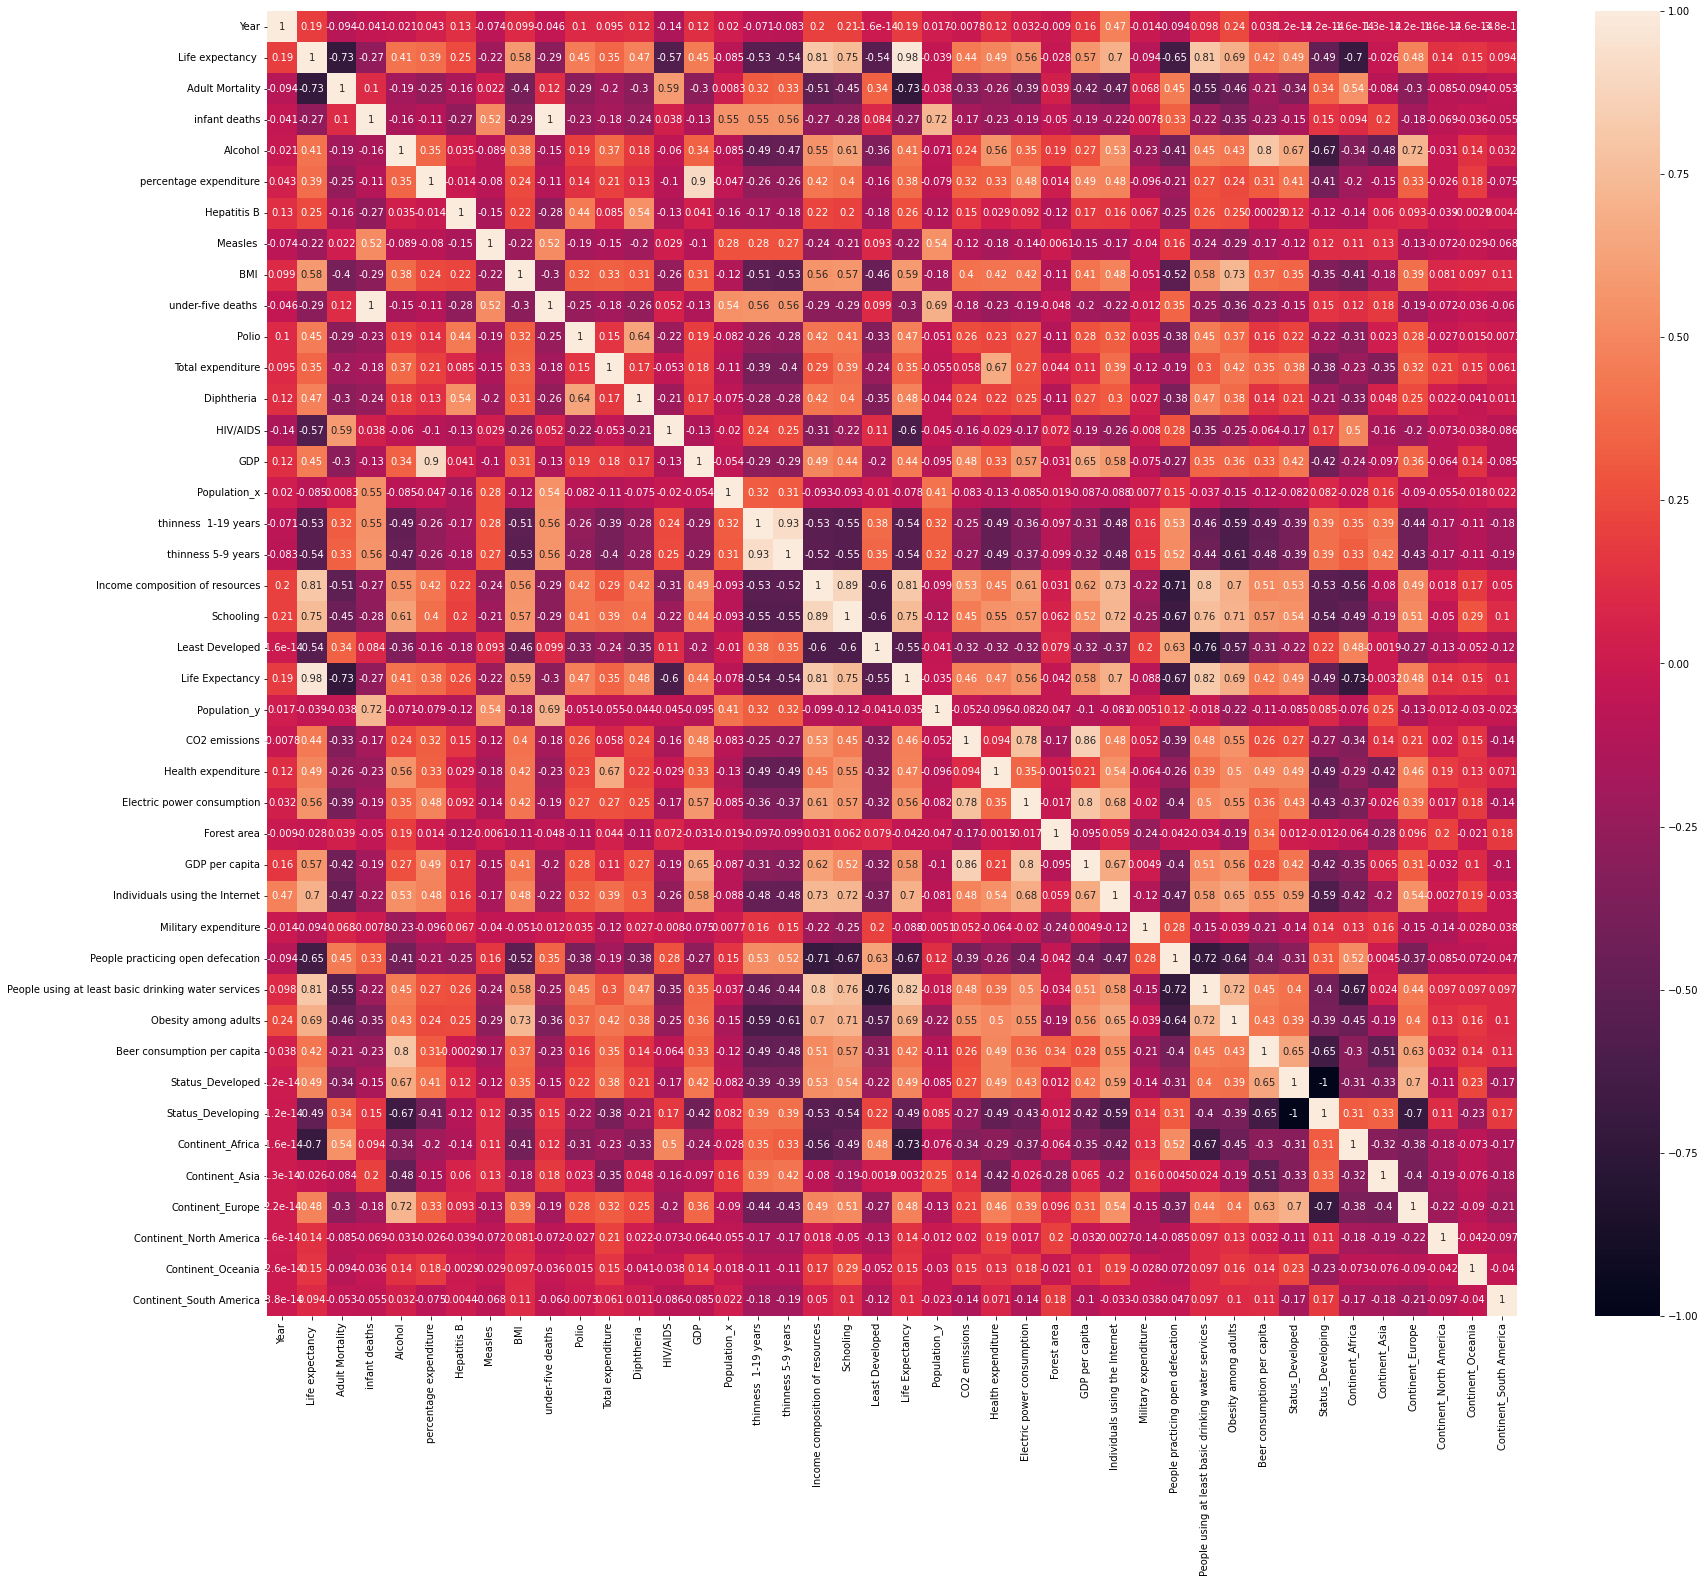

In [83]:
df_hm = pd.get_dummies(df.drop(columns='Country'))
corr = df_hm.corr()

plt.figure(figsize=(28,24))
sns.heatmap(corr, annot=True)
plt.show()

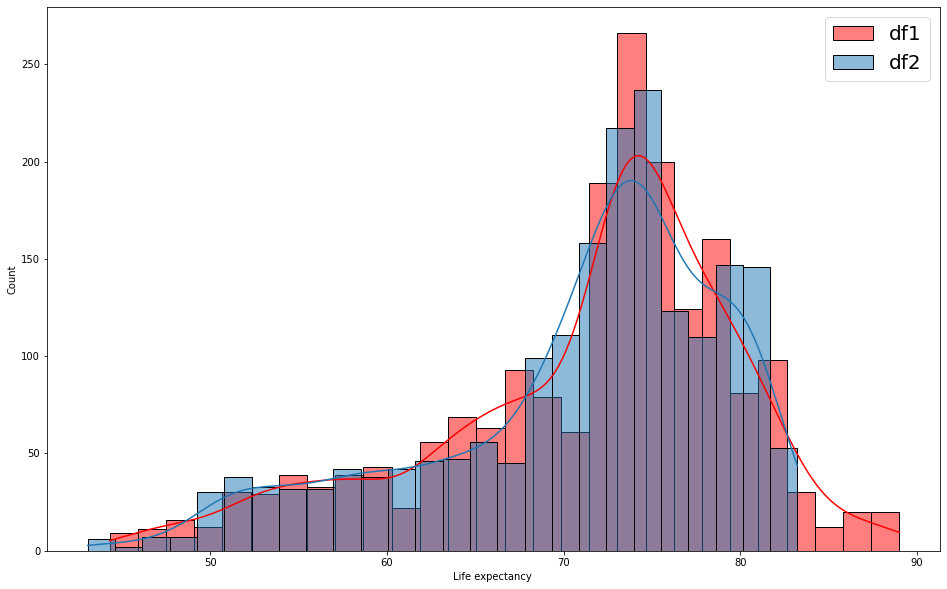

In [95]:
plt.figure(figsize=(16,10))
sns.histplot(df['Life expectancy '], kde=True, color='r', label='df1')
sns.histplot(df['Life Expectancy'], kde=True, label='df2')
plt.legend(fontsize=20);

Prochaines étapes :
  - ignorer les colonnes pays et année
  - construire le modèle pour prédire l'espérance de vie en ajoutant une à une des features 